<a href="https://colab.research.google.com/github/cirilwakounig/AlgorithmicTrading/blob/main/3_1_Decision_Tree_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction Stock Prices using Machine Learning**

---



This programme aims to predict stock prices based on the Decision Tree Method. The tutorial of this script can be found here: https://www.youtube.com/watch?v=hOLSGMEEwlI&ab_channel=ComputerScience

In [1]:
# Install the required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt

from pandas_datareader import data as web
from datetime import datetime
plt.style.use('bmh')

In [2]:
# Get the start and end dates
stockStartDate = '2019-04-18'
# Get the portfolio ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
stockEndDate = today

In [3]:
# Retrieve data about the preferred stock
stock = "NFLX"
df = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = stockEndDate)

# Return a data frame that has exactly 252 (a year's worth) trading days from the start date onwards
df = df.iloc[:252]
df.shape


(252, 6)

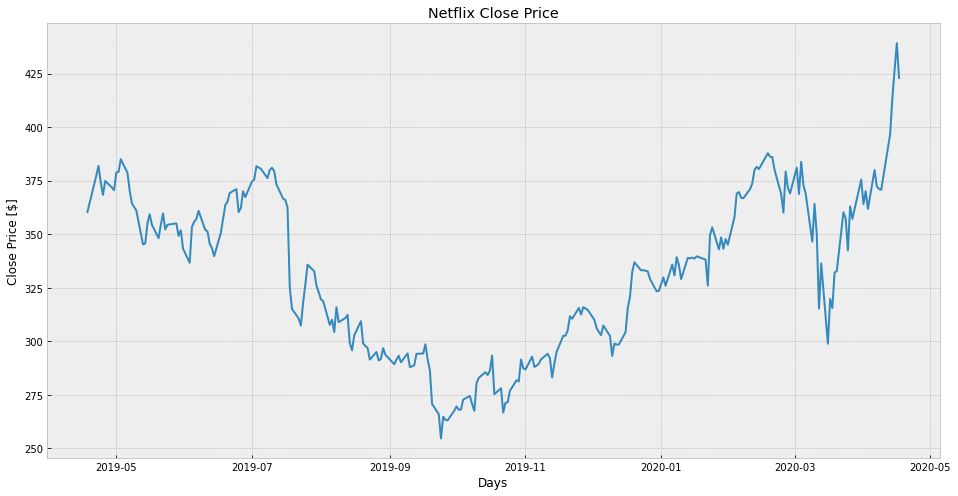

In [4]:
# Visualise Close Price Data
df = df[["Close"]]    # Double Brackets so that df is a data frame and not a data series

plt.figure(figsize = (16,8))
plt.title("Netflix Close Price")
plt.xlabel("Days")
plt.ylabel("Close Price [$]")
plt.plot(df)

### **Process the Data and Develop Feature and Predictor Sets and Split the Data into Test/Train** 

---



In [5]:
# Create a variable to predict 'x' days out into the future 
lead_time = 25

# Create new column for target values shifted x units/days up or down, to create feature pairs in each row with stock values that are lead_time days apart
df["Prediction"] = df[["Close"]].shift(-lead_time)    # Shifts the index of the close column shift(range) range times forward or backward and copies the values from the close column to prediction column
df.tail(4)

,Close,Prediction
Date,,
2020-04-14,413.549988,NaN
2020-04-15,426.750000,NaN
2020-04-16,439.170013,NaN
2020-04-17,422.959991,NaN


In [14]:
# Create the feature set (X), convert it to numpy and remove last 'x' rows/days
X = np.array(df[["Close"]])[:-lead_time]
print(X)

[[360.3500061 ]
 [377.33999634]
 [381.89001465]
 [374.23001099]
 [368.32998657]
 [374.8500061 ]
 [371.82998657]
 [370.54000854]
 [378.80999756]
 [379.05999756]
 [385.02999878]
 [378.67001343]
 [370.45999146]
 [364.36999512]
 [362.75      ]
 [361.04000854]
 [345.26000977]
 [345.60998535]
 [354.98999023]
 [359.30999756]
 [354.45001221]
 [348.10998535]
 [354.26998901]
 [359.73001099]
 [352.20999146]
 [354.39001465]
 [355.05999756]
 [349.19000244]
 [351.8500061 ]
 [343.27999878]
 [336.63000488]
 [353.3999939 ]
 [355.73001099]
 [357.13000488]
 [360.86999512]
 [352.01000977]
 [351.26998901]
 [345.55999756]
 [343.42999268]
 [339.73001099]
 [350.61999512]
 [357.11999512]
 [363.51998901]
 [365.20999146]
 [369.20999146]
 [371.04000854]
 [360.29998779]
 [362.20001221]
 [370.01998901]
 [367.32000732]
 [374.6000061 ]
 [375.42999268]
 [381.72000122]
 [380.54998779]
 [376.16000366]
 [379.92999268]
 [381.        ]
 [379.5       ]
 [373.25      ]
 [366.6000061 ]
 [365.98999023]
 [362.44000244]
 [325.20

In [7]:
# Create the target data set (y), convert it to numpy array and get all of the target values except the last x rows 
y = np.array(df["Prediction"])[:-lead_time]     # Output structure should not look like X, otherwise model predictions will not have the same dimensions
print(y)

[354.39001465 355.05999756 349.19000244 351.8500061  343.27999878
 336.63000488 353.3999939  355.73001099 357.13000488 360.86999512
 352.01000977 351.26998901 345.55999756 343.42999268 339.73001099
 350.61999512 357.11999512 363.51998901 365.20999146 369.20999146
 371.04000854 360.29998779 362.20001221 370.01998901 367.32000732
 374.6000061  375.42999268 381.72000122 380.54998779 376.16000366
 379.92999268 381.         379.5        373.25       366.6000061
 365.98999023 362.44000244 325.20999146 315.1000061  310.61999512
 307.29998779 317.94000244 326.45999146 335.77999878 332.70001221
 325.92999268 322.98999023 319.5        318.82998657 307.63000488
 310.1000061  304.29000854 315.8999939  308.92999268 310.82998657
 312.27999878 299.10998535 295.76000977 302.79998779 309.38000488
 298.98999023 297.80999756 296.92999268 291.44000244 294.98001099
 291.02999878 291.76998901 296.77999878 293.75       289.29000854
 291.51998901 293.25       290.17001343 294.33999634 287.98999023
 288.269989

In [8]:
# Split the data into 75 % training and 25 % testing
# Train test split does not select data in a chronological order, but instead randomises it
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

### **Create the Models for Predicting Stock Prices**

---



In [9]:
# Create a decision tree regressor model by training it on the train samples
tree = DecisionTreeRegressor().fit(x_train,y_train) 

# Create a linear regression model
lrm = LinearRegression().fit(x_train,y_train)

In [10]:
# Get the last 'x' rows of the Feature Dataset for which we are predicting the prices
# Obtain a shortened dataframe containing all but the last lead_time days of the stock prices
x_predict = df[["Close"]][:-lead_time]
# Take the last lead_time days of the shortened dataframe and assign them to the x_predict
x_predict = np.array(x_predict.tail(lead_time))
x_predict

array([[366.95001221],
       [366.76998901],
       [371.07000732],
       [373.69000244],
       [380.01000977],
       [381.3999939 ],
       [380.3999939 ],
       [387.77999878],
       [386.19000244],
       [386.        ],
       [380.07000732],
       [368.70001221],
       [360.08999634],
       [379.23999023],
       [371.70999146],
       [369.02999878],
       [381.04998779],
       [368.76998901],
       [383.79000854],
       [372.77999878],
       [368.97000122],
       [346.48999023],
       [364.13000488],
       [349.92001343],
       [315.25      ]])

### **Predicted Results and Visualisation**

---



In [11]:
# Show the Decision Tree Model Predictions by predicting for the last 25 days of the total dataset
tree_prediction = tree.predict(x_predict)
print(tree_prediction)
print()

# Show the Linear Regression Model Predictions
lrm_prediction = lrm.predict(x_predict)
print(lrm_prediction)

[336.29998779 298.83999634 319.75       315.47000122 357.11999512
 332.82998657 360.26998901 357.32000732 342.39001465 342.39001465
 357.11999512 370.95999146 375.5        364.07998657 370.07998657
 361.76000977 379.95999146 370.95999146 371.11999512 370.72000122
 349.92001343 413.54998779 426.75       439.17001343 422.95999146]

[352.95434722 352.84072679 355.5546545  357.20824685 361.19707708
 362.07435624 361.44321295 366.10105353 365.097538   364.97761924
 361.23494413 354.05884798 348.62469421 360.71108442 355.95857619
 354.26711679 361.85345223 354.10301337 363.58279795 356.63390414
 354.22924973 340.04114158 351.17451851 342.20597771 320.32423128]


(25, 2)
<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


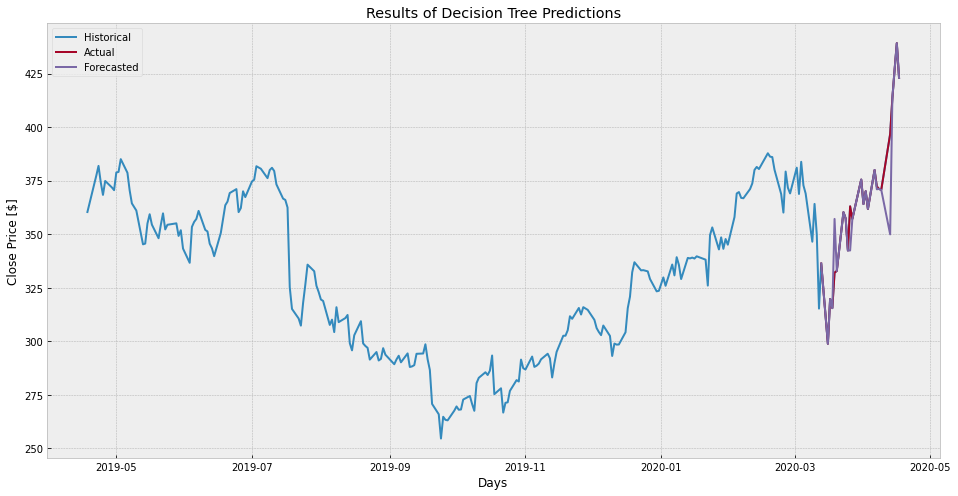

In [12]:
# Visualise the Data predicted by the Decision Tree Model
predictions = tree_prediction

# Create a actual df with the last lead_time actual stock values
actual = df[X.shape[0]:]
print(actual.shape)
actual["Predictions"] = predictions
print(type(actual))
actual
plt.figure(figsize = (16,8))
plt.title("Results of Decision Tree Predictions")
plt.xlabel("Days")
plt.ylabel("Close Price [$]")
plt.plot(df["Close"])
plt.plot(actual["Close"])
plt.plot(actual["Predictions"])
plt.legend(['Historical', 'Actual', 'Forecasted'])
plt.show()


(25, 2)
<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


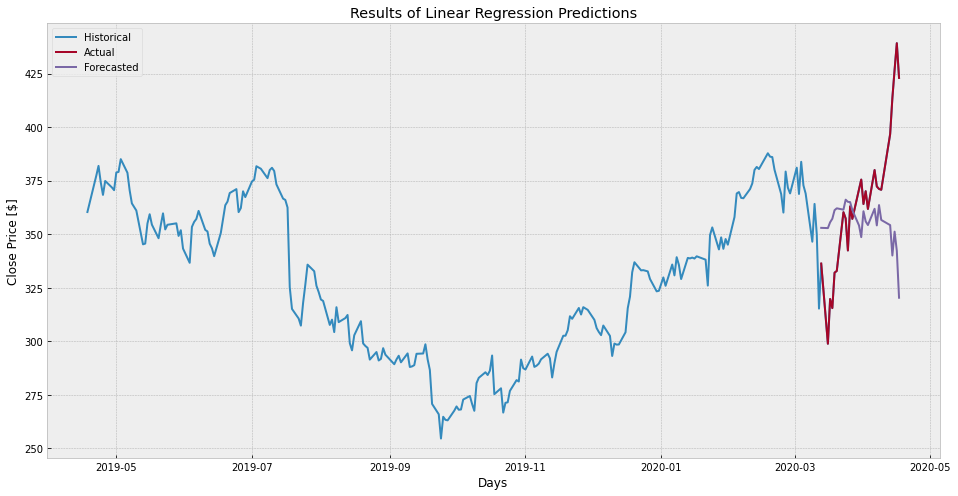

In [13]:
# Visualise the Data predicted by the Linear Regression Model
predictions = lrm_prediction

# Create a actual df with the last lead_time actual stock values
actual = df[X.shape[0]:]
print(actual.shape)
actual["Predictions"] = predictions
print(type(actual))
actual
plt.figure(figsize = (16,8))
plt.title("Results of Linear Regression Predictions")
plt.xlabel("Days")
plt.ylabel("Close Price [$]")
plt.plot(df["Close"])
plt.plot(actual["Close"])
plt.plot(actual["Predictions"])
plt.legend(['Historical', 'Actual', 'Forecasted'])
plt.show()


As can be seen, the linear regression model performs significantly worse than the decision tree model. 